<a href="https://colab.research.google.com/github/NishVish/Syrvery-Analysis-EDA-/blob/main/Survery%20Analysis%20(JB_Music_Therepy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Company Overview
JB Music Therapy is a team of Certified Music Therapists who collaborate,
design, and personalize therapy with their clients that will foster desired change: boost mood, decrease stress,
strengthen relationships, increase focus, develop learning, reduce anxiety, rehab after an injury, and recover lost memories.
JB Music Therapy is the largest employer of Music Therapists in Canada.
##JB Music: Primary Services

The core services they offer are;

- Individual therapy

- Group programs

- Public Education

##Project Background
For this project, a survey was conducted to assess the impact of music on people's mental health and mood in general. The survey recorded responses from over 700 participants and includes details like musical preferences, listening habits, and overall state of mind. Respondents were given 16 genres of music for which they ranked the frequency of listening to each. The responses ranged from never, to very frequently.

Moreover, the respondents also ranked the intensity of their feelings of anxiety, depression, insomnia, and OCD on a scale of 1 to 10. 0 being the lowest in intensity to 10 being the highest.

##Dataset and Description

---
Dataset is provided in Csv Format

##Project Objective
1. Data Cleaning and Processing

2. Data Visualization: Visualize the data to make it easy to understand.

3. Data Reporting: Use the insights and correlations within the data to make recommendations.

##Plan
Dividing the Whole Process in 4 Part
1. Data Cleaning
2. EDA
3. Correlation Analysis
4. Reporting

###Part 1
Data Cleaning and Preprocessing

* Identify and handle missing values.
* Deal with outliers and anomalies.
* Remove duplicates and ensure data integrity.
* Perform necessary data transformations.

###Part 2
Exploratory Data Analysis (EDA)

Conduct descriptive analysis of variables.
Explore the distribution of age groups.
Analyze music preferences and listening habits.
Investigate the intensity of anxiety, depression, insomnia, and OCD.

Perform EDA we will use :
1. Responded Analysis(How Well Respondet has Responded)
1.   Type of Music
2. Listening Duration
3. Effect of Mood



###Part 3





Type of Insight we Gain are:-
*   Which Type of Music Averagely Improve Mood
*   Which Music Should Be Recommened For Each Age Group for Good Mood

*   Which Type of Music is Bad

###Part 4
Coreelation Analysis




In [ ]:
# Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statistics



In [ ]:
# Loading Dataset
link = 'https://cdn.disco.co/media%2FMusic-and-Therapy-survey-1_0b9a67c4-c4fc-4b61-bf8e-27ee5e696424.csv'
df = pd.read_csv(link)


### Part 1
Cleaning and Processing Data

In [ ]:
# duplicate data
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [ ]:
# Null Value
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

There are Missing vales in the Data and BPM Colums has Many Missing Values so we will fix the Data by Appropiate Vale, But the Other Missing Variable will have little to none impact on the Data Analysis So we can drop those rows later

In [ ]:
# Handling Missing Values of BPM
# Exploring the BPM Column to find Value to fill missing Value
print(df['BPM'].describe())
print(df['BPM'].head())

count    6.290000e+02
mean     1.589948e+06
std      3.987261e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64
0    156.0
1    119.0
2    132.0
3     84.0
4    107.0
Name: BPM, dtype: float64


In [ ]:
# Exploring the Column More Preciesely
print("max:",df['BPM'].max())
print("mean",df['BPM'].mean())
print("median",df['BPM'].median())
print("mode",df['BPM'].mode())
print("min",df['BPM'].min())

max: 999999999.0
mean 1589948.344992051
median 120.0
mode 0    120.0
Name: BPM, dtype: float64
min 0.0


In [ ]:
# Remove outliers BPM
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ddf = df[(df['BPM'] >= lower_bound) & (df['BPM'] <= upper_bound)]

# # Fill missing values with the median
# median_bpm = df['BPM'].median()
# df['BPM'].fillna(median_bpm, inplace=True)


In [ ]:
ddf['BPM'].shape

(618,)

In [ ]:
ddf.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,24.561489,3.731715,123.294498,5.868123,4.865696,3.813107,2.637540
std,11.393945,3.101088,31.403228,2.758368,2.997393,3.102167,2.840809
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,143.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,210.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Remove outliers Age
xx = ddf['Age']
Q1 = xx.quantile(0.25)
Q3 = xx.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ddf = ddf[(xx >= lower_bound) & (xx <= upper_bound)]


In [ ]:
ddf.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,21.661348,3.768528,123.590426,6.025709,4.992908,3.823582,2.755319
std,5.901548,3.020058,31.340801,2.679067,2.982326,3.095202,2.899971
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,20.000000,3.000000,120.000000,7.000000,5.000000,3.000000,2.000000
75%,24.250000,5.000000,143.250000,8.000000,7.000000,6.000000,5.000000
max,40.000000,24.000000,210.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
ddf.shape

(564, 33)

In [ ]:
# # Remove outliers Age
# xx = ddf['Hours per day']
# Q1 = xx.quantile(0.25)
# Q3 = xx.quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# ddf = ddf[(xx >= lower_bound) & (xx <= upper_bound)]
# ddf.shape

In [ ]:
ddf.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,21.661348,3.768528,123.590426,6.025709,4.992908,3.823582,2.755319
std,5.901548,3.020058,31.340801,2.679067,2.982326,3.095202,2.899971
min,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,20.000000,3.000000,120.000000,7.000000,5.000000,3.000000,2.000000
75%,24.250000,5.000000,143.250000,8.000000,7.000000,6.000000,5.000000
max,40.000000,24.000000,210.000000,10.000000,10.000000,10.000000,10.000000


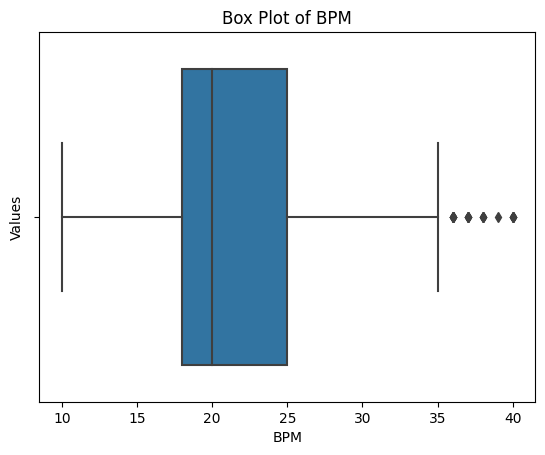

In [ ]:

# Create a box plot
sns.boxplot(x=ddf['Age'])

# Add labels and title
plt.xlabel('BPM')
plt.ylabel('Values')
plt.title('Box Plot of BPM')

# Show the plot
plt.show()

##EDA
Effect of Music on Mood

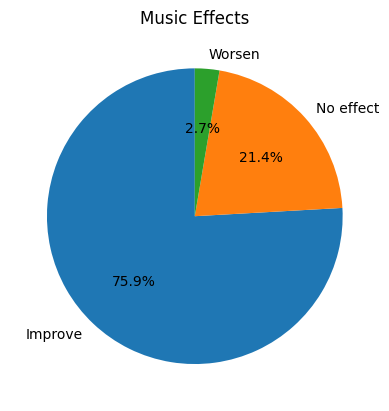

In [ ]:
effect_counts = ddf['Music effects'].value_counts()

# Plotting the pie chart
effect_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Adding labels and title
plt.title('Music Effects')
plt.ylabel('')
plt.show()

Analyzing Habits of People that said music Improve their Mood

In [ ]:
improve= ddf[ddf['Music effects']=='Improve']
improve.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,21.221176,3.916941,124.251765,6.241176,5.018824,3.831765,2.917647
std,5.617780,3.098599,32.082737,2.532119,2.878576,3.037199,2.908437
min,10.000000,0.500000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,100.000000,4.000000,3.000000,1.000000,0.000000
50%,19.000000,3.000000,120.000000,7.000000,5.000000,4.000000,2.000000
75%,24.000000,5.000000,145.000000,8.000000,7.000000,6.000000,5.000000
max,40.000000,24.000000,210.000000,10.000000,10.000000,10.000000,10.000000


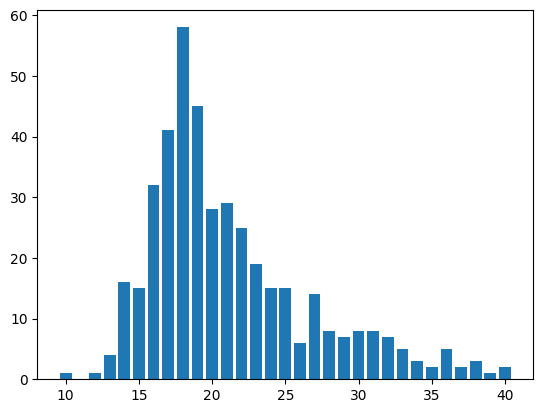

In [ ]:
xh = improve['Age'].value_counts()
plt.bar(xh.index,xh)
plt.show()

There are total 400 people that said music impove their mood after listening music among those those 400 75% are of Age Under 24

<Axes: ylabel='Fav genre'>

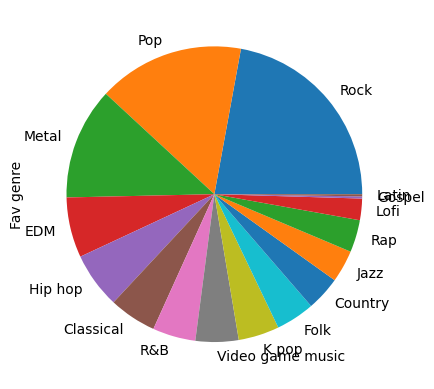

In [ ]:
favM = improve['Fav genre'].value_counts()
favM.plot.pie()

###Descriptive Summary
People Who Said Music Improve Thier Mood

* Average Age is 21 and 75% of the People are Under 25 who Said Music Improves their Mood
* Rock ,Pop ,Metal, EDM and Hiphop are Top 5 Genre
* The Listen to Music on average between 3-4 hrs

Their Average Anxiety	|Depression|	Insomnia|	OCD Levels are

6.175063	|4.909320|	3.741814|	2.874055

In [ ]:
noEff= ddf[ddf['Music effects']=='No effect']
noEff.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,23.116667,3.393750,121.858333,5.266667,4.675000,3.775000,2.225000
std,6.282139,2.735478,29.171845,2.986618,3.186533,3.311458,2.787917
min,15.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.500000,99.000000,3.000000,2.000000,0.000000,0.000000
50%,21.500000,3.000000,120.000000,5.000000,5.000000,3.000000,1.000000
75%,26.000000,4.000000,140.000000,8.000000,7.000000,7.000000,3.000000
max,40.000000,14.000000,204.000000,10.000000,10.000000,10.000000,10.000000


<Axes: ylabel='Fav genre'>

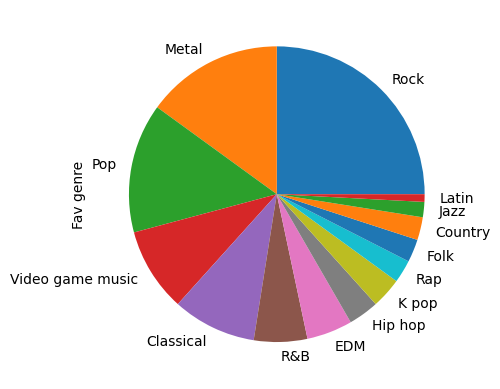

In [ ]:
favM = noEff['Fav genre'].value_counts()
favM.plot.pie()

In [ ]:
wrost= ddf[ddf['Music effects']=='Worsen']
wrost.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,23.200000,2.933333,118.533333,6.666667,7.200000,4.466667,3.133333
std,8.961824,3.017015,30.345314,2.768875,3.233751,3.113718,3.226379
min,13.000000,0.000000,60.000000,2.000000,0.000000,0.000000,0.000000
25%,15.500000,1.000000,104.000000,4.500000,5.500000,2.500000,0.500000
50%,21.000000,2.000000,120.000000,7.000000,8.000000,4.000000,2.000000
75%,31.500000,3.500000,133.500000,9.000000,10.000000,7.000000,5.000000
max,38.000000,12.000000,180.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
wrost.describe(include='object')

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
unique,14,3,2,2,2,5,2,2,4,4,...,4,4,4,4,4,4,4,4,1,1
top,8/28/2022 23:23,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Sometimes,Very frequently,Rarely,Rarely,Very frequently,Never,Worsen,I understand.
freq,2,12,10,11,13,7,9,8,5,10,...,9,8,4,5,6,5,6,5,15,15


In [ ]:
coll = wrost.columns
for xb in coll:
  print(wrost[xb].value_counts())

<Axes: ylabel='Fav genre'>

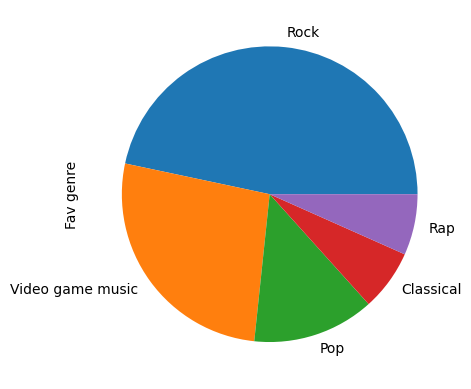

In [ ]:
favM = wrost['Fav genre'].value_counts()
favM.plot.pie()

In [ ]:
def jsd (s):
  cc= improve
  if s == 'improve':
    cc = improve
  elif s == "noEff":
    cc = noEff
  else :
    cc = wrost
  print(cc.describe())
  print(cc.describe(include='object'))
  favM = cc['Fav genre'].value_counts()
  favM.plot.pie()
  plt.show()

In [ ]:
a = "improve"
b = "noEff"
c = "wrost"

              Age  Hours per day         BPM     Anxiety  Depression  \
count  120.000000     120.000000  120.000000  120.000000  120.000000   
mean    23.116667       3.393750  121.858333    5.266667    4.675000   
std      6.282139       2.735478   29.171845    2.986618    3.186533   
min     15.000000       0.000000   66.000000    0.000000    0.000000   
25%     18.000000       1.500000   99.000000    3.000000    2.000000   
50%     21.500000       3.000000  120.000000    5.000000    5.000000   
75%     26.000000       4.000000  140.000000    8.000000    7.000000   
max     40.000000      14.000000  204.000000   10.000000   10.000000   

         Insomnia         OCD  
count  120.000000  120.000000  
mean     3.775000    2.225000  
std      3.311458    2.787917  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      3.000000    1.000000  
75%      7.000000    3.000000  
max     10.000000   10.000000  
             Timestamp Primary streaming service While working 

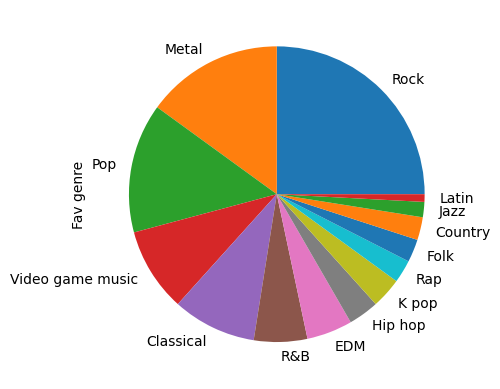

In [ ]:
jsd("noEff")

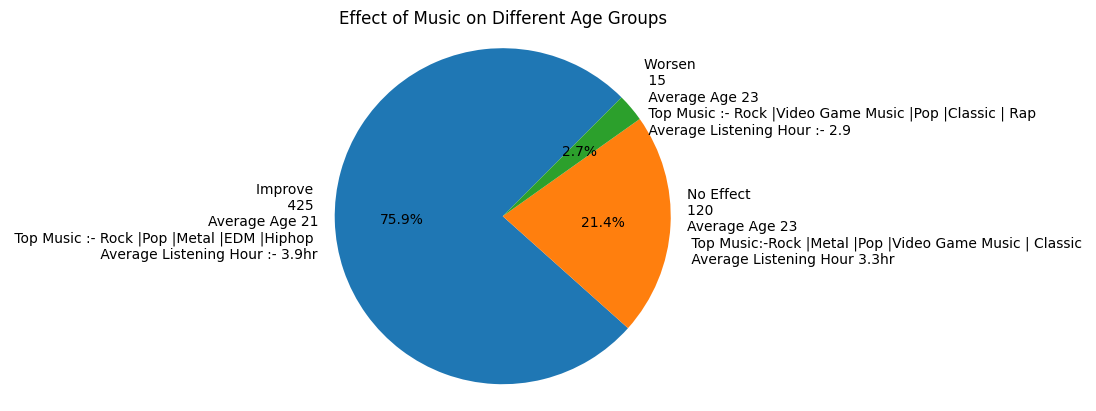

In [ ]:

j = ['Improve \n 425 \nAverage Age 21\n Top Music :- Rock |Pop |Metal |EDM |Hiphop \n Average Listening Hour :- 3.9hr', 'No Effect\n120 \nAverage Age 23 \n Top Music:-Rock |Metal |Pop |Video Game Music | Classic \n Average Listening Hour 3.3hr  ','Worsen \n 15 \n Average Age 23 \n Top Music :- Rock |Video Game Music |Pop |Classic | Rap \n Average Listening Hour :- 2.9']
k = [425, 120,15]

plt.pie(k, labels=j, autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Effect of Music on Different Age Groups')
plt.show()

Project Summary:

-Survey Data Analysis: Impact of Music on Mental Health (Month Year - Month Year)
-Conducted an in-depth analysis of survey data to investigate the impact of music on mental health.
-Collected responses from over 700 participants and examined variables such as musical preferences, listening habits, and mental health indicators.
-Cleaned and preprocessed the data by handling missing values, outliers, and duplicate entries.
-Performed exploratory data analysis (EDA) to gain insights into age groups, music types, listening duration, and their effects on mood.
-Utilized data visualization techniques to present key findings and correlations through plots, charts, and graphs.
-Conducted correlation analysis to determine relationships between music preferences, mental health indicators, and mood.
-Summarized the results in a comprehensive report and provided actionable recommendations based on the analysis.
-Tools and Technologies Used: Python, pandas, matplotlib, seaborn.